In [3]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [4]:
# Data Preparation (Pandas)

df = pd.read_csv(r"C:\Users\chsiv\OneDrive\Desktop\10k coders\New folder\sales_data_500.csv", parse_dates=['Order Date', 'Ship Date'])

In [5]:
# Data Preparation (NumPy)

df['Sales per Unit'] = np.where(df['Quantity'] > 0, df['Sales'] / df['Quantity'], np.nan)


revenue_calc = np.where(df['Sales'] * (1 - df['Discount']) != 0,
                         df['Sales'] * (1 - df['Discount']),
                         np.nan)

df['Profit Margin'] = df['Profit'] / revenue_calc

df['Low Profit Flag'] = np.where(df['Profit Margin'] < 0.05, True, False)



print(df.isna().sum())


Order ID            0
Customer ID         0
Product Category    0
Product Name        0
Order Date          0
Ship Date           0
Sales               0
Quantity            0
Discount            0
Profit              0
Region              0
Sales per Unit      0
Profit Margin       0
Low Profit Flag     0
dtype: int64


In [6]:
# Statistical Analysis (NumPy + Pandas)

df['Product Name'] = df['Product Name'].fillna('Unknown')


df['Sales'] = df['Sales'].abs()
df['Quantity'] = df['Quantity'].abs()


df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')
df['Weekday'] = df['Order Date'].dt.day_name()


print("Total Sales:", df['Sales'].sum())
print("Average Profit:", df['Profit'].mean())
print("Std Dev of Discount:", df['Discount'].std())

print("\nTop 5 Products:\n", df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5))
print("\nProfit by Region:\n", df.groupby('Region')['Profit'].sum())

Total Sales: 321434.33
Average Profit: 172.86092000000002
Std Dev of Discount: 0.08394166072225173

Top 5 Products:
 Product Name
Phone         62743.74
Laptop        53021.36
Headphones    48540.71
Camera        45253.48
Vacuum        19449.78
Name: Sales, dtype: float64

Profit by Region:
 Region
Central    18121.90
East       16477.56
North      17063.20
South      18878.93
West       15888.87
Name: Profit, dtype: float64


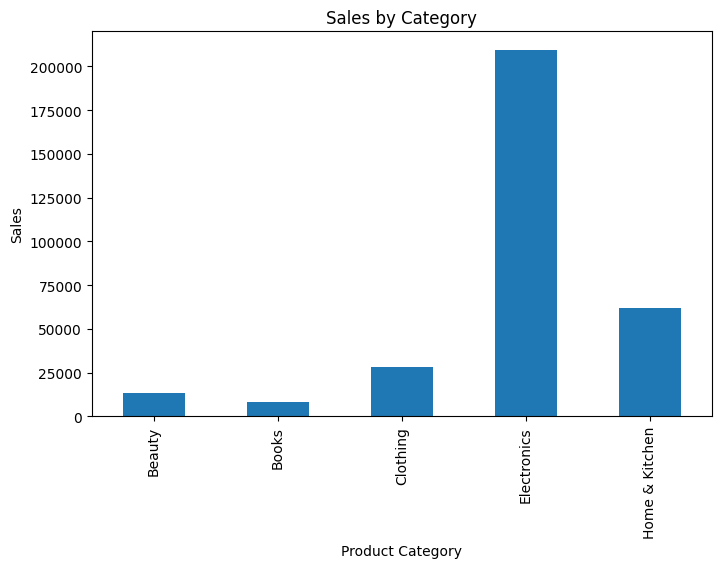

In [7]:
# Data Visualization (Matplotlib + Pandas Plotting)

df.groupby('Product Category')['Sales'].sum().plot(kind='bar', figsize=(8,5))
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()

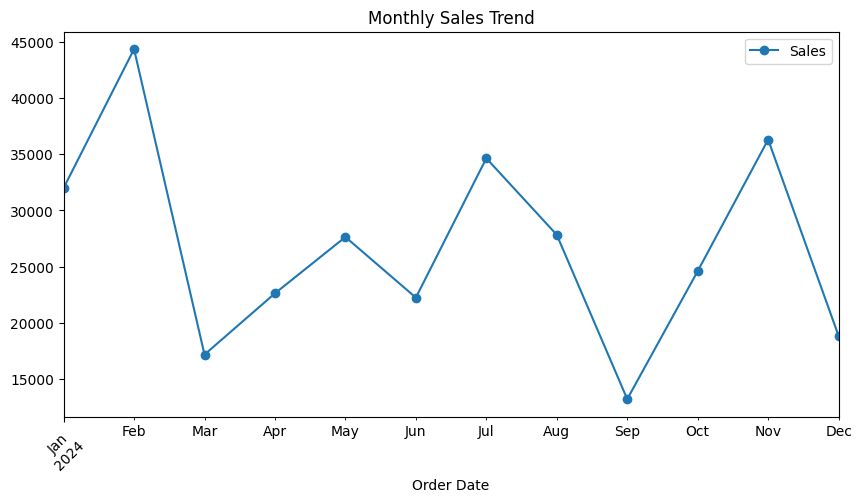

In [9]:
# Insight Generation
# Bonus/Advanced

monthly_sales = df.set_index('Order Date').resample('ME')['Sales'].sum()
monthly_sales.plot(marker='o', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.legend()
plt.show()

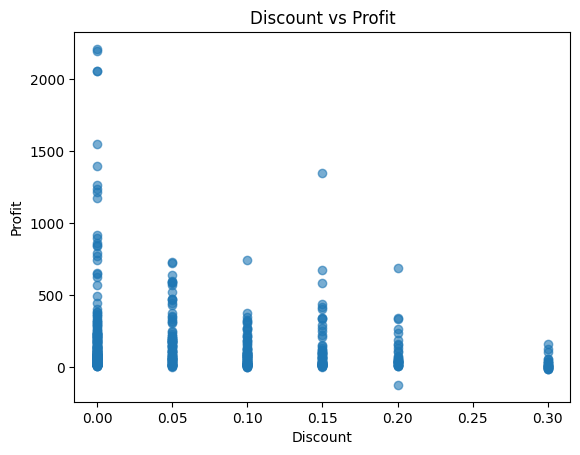

In [10]:
# Insight Generation
# Bonus/Advanced

plt.scatter(df['Discount'], df['Profit'], alpha=0.6)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

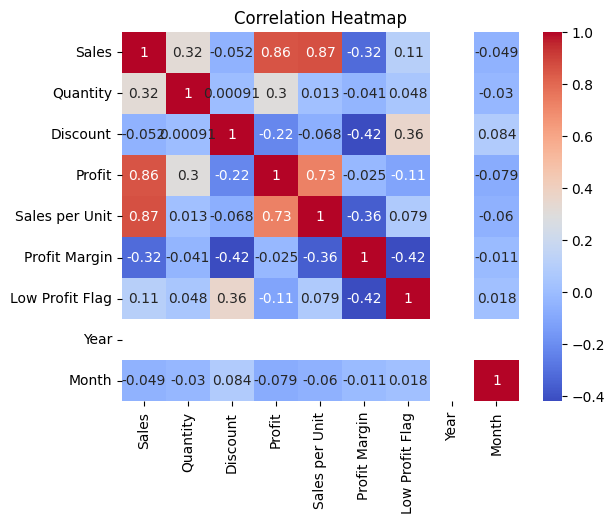

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()